*Loading the dataset and viewing its first few rows and the summary.*

In [1]:
tel_data<- read.csv('../input/telecomdata/tel.csv')
head(tel_data)
summary(tel_data)

,Hours,ByDa,RWT,SOA,SOB,SOC,Field,Hot,Day
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,111,62,34,496,0,0,36,12,3
2,114,35,29,258,0,0,34,16,4
3,70,74,19,39,0,1,27,9,5
4,114,97,19,376,5,1,26,28,1
5,87,83,31,107,1,1,9,14,2
6,105,49,69,78,2,1,25,16,3


     Hours            ByDa             RWT              SOA       
 Min.   : 48.0   Min.   :  0.00   Min.   :  0.00   Min.   :  0.0  
 1st Qu.: 92.0   1st Qu.: 42.00   1st Qu.: 24.50   1st Qu.:170.0  
 Median :108.0   Median : 56.00   Median : 35.00   Median :283.0  
 Mean   :101.8   Mean   : 60.39   Mean   : 42.87   Mean   :263.8  
 3rd Qu.:114.5   3rd Qu.: 74.00   3rd Qu.: 66.50   3rd Qu.:352.5  
 Max.   :124.0   Max.   :174.00   Max.   :109.00   Max.   :496.0  
      SOB              SOC             Field            Hot             Day   
 Min.   : 0.000   Min.   : 0.000   Min.   : 9.00   Min.   : 0.00   Min.   :1  
 1st Qu.: 0.000   1st Qu.: 0.000   1st Qu.:18.00   1st Qu.: 9.00   1st Qu.:2  
 Median : 1.000   Median : 1.000   Median :22.00   Median :11.00   Median :3  
 Mean   : 2.387   Mean   : 2.548   Mean   :24.87   Mean   :12.19   Mean   :3  
 3rd Qu.: 4.000   3rd Qu.: 2.000   3rd Qu.:28.00   3rd Qu.:16.00   3rd Qu.:4  
 Max.   :12.000   Max.   :35.000   Max.   :92.00   Max.  

*Regressing **Hours** on all the variables*

In [2]:
mod_all<-lm( Hours~ ByDa+RWT+SOA+SOB+SOC+Field+Hot+Day, data=tel_data)
summary(mod_all)


Call:
lm(formula = Hours ~ ByDa + RWT + SOA + SOB + SOC + Field + Hot + 
    Day, data = tel_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.166  -6.089  -1.662   7.358  18.749 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 66.56767   14.37798   4.630  0.00013 ***
ByDa        -0.14479    0.11348  -1.276  0.21528    
RWT          0.33042    0.11946   2.766  0.01127 *  
SOA          0.06501    0.01837   3.540  0.00184 ** 
SOB         -0.19097    0.93128  -0.205  0.83941    
SOC          0.24518    0.40514   0.605  0.55126    
Field        0.16305    0.18325   0.890  0.38321    
Hot          1.31371    0.45730   2.873  0.00884 ** 
Day         -2.52555    2.17472  -1.161  0.25796    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.64 on 22 degrees of freedom
Multiple R-squared:  0.7046,	Adjusted R-squared:  0.5972 
F-statistic: 6.559 on 8 and 22 DF,  p-value: 0.0002116


In [3]:
confint(mod_all)

,2.5 %,97.5 %
(Intercept),36.74956729,96.3857723
ByDa,-0.38013721,0.0905481
RWT,0.08267517,0.5781664
SOA,0.02692215,0.1031032
SOB,-2.12233312,1.7403991
SOC,-0.59503433,1.0853886
Field,-0.21698234,0.5430812
Hot,0.36531865,2.2621002
Day,-7.03565043,1.9845566


Few things to be noted from this regression model- Hot and SOA, followed by RWT have coefficients that are positive and significant. The hotline seems to be contributing high number of hours as well as SOA- number of service orders of type A. 

*Creating a new variable for Friday*

In [4]:
tel_data <- transform(tel_data, Friday= ifelse(Day==5, 1, 0))
tel_data

Hours,ByDa,RWT,SOA,SOB,SOC,Field,Hot,Day,Friday
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
111,62,34,496,0,0,36,12,3,0
114,35,29,258,0,0,34,16,4,0
70,74,19,39,0,1,27,9,5,1
114,97,19,376,5,1,26,28,1,0
87,83,31,107,1,1,9,14,2,0
105,49,69,78,2,1,25,16,3,0
114,57,30,385,0,0,15,9,4,0
87,44,14,356,0,0,11,10,5,1
107,46,16,219,2,0,18,11,1,0


*Regressing **Hours** on all variables including Friday*

In [5]:
mod_all2<-lm(Hours~.,data=tel_data)
summary(mod_all2)


Call:
lm(formula = Hours ~ ., data = tel_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.0190  -6.5432  -0.6165   6.4942  11.4557 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  72.58088   11.13276   6.520 1.85e-06 ***
ByDa         -0.04155    0.09074  -0.458 0.651727    
RWT           0.14136    0.10290   1.374 0.183998    
SOA           0.04507    0.01493   3.019 0.006536 ** 
SOB          -0.64708    0.72347  -0.894 0.381241    
SOC           0.17931    0.31131   0.576 0.570758    
Field         0.09569    0.14160   0.676 0.506565    
Hot           0.91747    0.36433   2.518 0.019975 *  
Day           2.41577    2.06813   1.168 0.255861    
Friday      -30.70286    7.59039  -4.045 0.000584 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.929 on 21 degrees of freedom
Multiple R-squared:  0.834,	Adjusted R-squared:  0.7628 
F-statistic: 11.72 on 9 and 21 DF,  p-value: 2.302e-06


In [6]:
confint(mod_all2); confint(mod_all)

,2.5 %,97.5 %
(Intercept),49.42904856,95.73271535
ByDa,-0.23026205,0.14715956
RWT,-0.07262813,0.35534463
SOA,0.01402141,0.07612364
SOB,-2.15161427,0.85746201
SOC,-0.46810647,0.82672138
Field,-0.19878376,0.39015875
Hot,0.15979635,1.67513754
Day,-1.88514789,6.71668116
Friday,-46.48794650,-14.91776603


,2.5 %,97.5 %
(Intercept),36.74956729,96.3857723
ByDa,-0.38013721,0.0905481
RWT,0.08267517,0.5781664
SOA,0.02692215,0.1031032
SOB,-2.12233312,1.7403991
SOC,-0.59503433,1.0853886
Field,-0.21698234,0.5430812
Hot,0.36531865,2.2621002
Day,-7.03565043,1.9845566


In [7]:
cor(tel_data$Hours,tel_data$Friday)
cor(tel_data$Hot,tel_data$Friday)
cor(tel_data$RWT,tel_data$Friday)
cor(tel_data$SOA,tel_data$Friday)

[1] -0.8187196

[1] -0.2895874

[1] -0.4659158

[1] -0.466299

We see that on Friday there is strongly negatively correlated to Hours. When Friday is included as a variable, the high influence of SOA, Hot and RWT seen in the previous model also reduces. However, the correlation of Hot and SOA to hours is still not inconsequential. 

*Selecting the best model using **backward selection***

In [8]:
step(mod_all2,direction="backward")
mod_final<- lm(Hours~RWT+SOA+Hot+Day+Friday,data=tel_data)

Start:  AIC=143.66
Hours ~ ByDa + RWT + SOA + SOB + SOC + Field + Hot + Day + Friday

         Df Sum of Sq    RSS    AIC
- ByDa    1     16.72 1690.9 141.97
- SOC     1     26.45 1700.6 142.15
- Field   1     36.41 1710.5 142.33
- SOB     1     63.77 1737.9 142.82
- Day     1    108.77 1782.9 143.61
<none>                1674.2 143.66
- RWT     1    150.46 1824.6 144.33
- Hot     1    505.55 2179.7 149.84
- SOA     1    726.46 2400.6 152.83
- Friday  1   1304.38 2978.5 159.52

Step:  AIC=141.97
Hours ~ RWT + SOA + SOB + SOC + Field + Hot + Day + Friday

         Df Sum of Sq    RSS    AIC
- Field   1     24.97 1715.8 140.42
- SOC     1     34.33 1725.2 140.59
- SOB     1     47.34 1738.2 140.82
<none>                1690.9 141.97
- RWT     1    169.47 1860.3 142.93
- Day     1    218.11 1909.0 143.73
- Hot     1    492.78 2183.6 147.90
- SOA     1    735.06 2425.9 151.16
- Friday  1   1508.08 3198.9 159.73

Step:  AIC=140.42
Hours ~ RWT + SOA + SOB + SOC + Hot + Day + Friday

        


Call:
lm(formula = Hours ~ RWT + SOA + Hot + Day + Friday, data = tel_data)

Coefficients:
(Intercept)          RWT          SOA          Hot          Day       Friday  
   74.44553      0.11363      0.04198      0.81950      2.44164    -30.49523  


*Using the final model with 5 variables to predict Hours and examining the residuals*

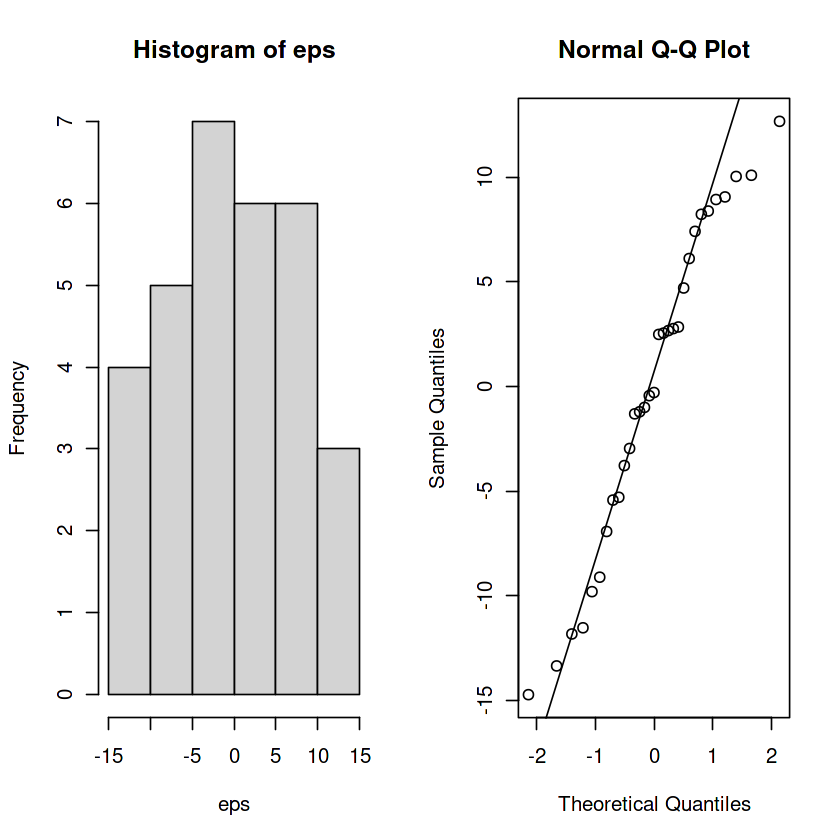

In [9]:
eps<-tel_data$Hours-predict(mod_final)
par(mfrow=c(1,2))
hist(eps)
qqnorm(eps)
qqline(eps)

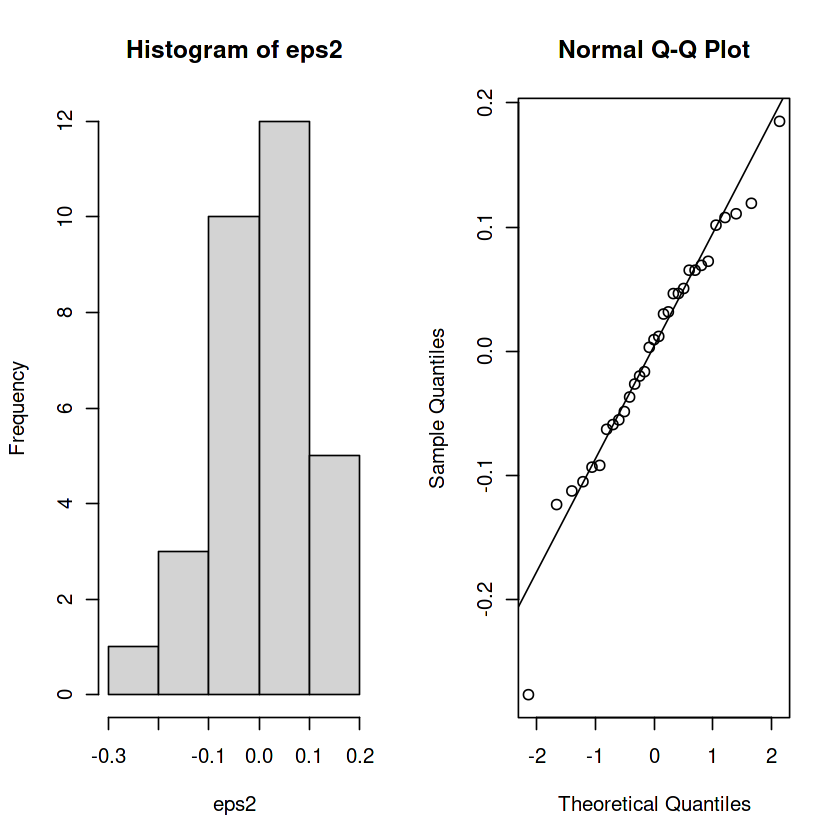

In [10]:
log_mod<-lm(log(Hours)~RWT+SOA+Hot+Day+Friday,data=tel_data)
eps2<-log(tel_data$Hours)-predict(log_mod)
par(mfrow=c(1,2))
hist(eps2)
qqnorm(eps2)
qqline(eps2)